In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
# from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm_notebook as tqdm
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
# from yellowbrick.model_selection import LearningCurve
# from yellowbrick.classifier import ClassificationReport
# from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier, LogisticRegressionCV
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
%matplotlib

Using matplotlib backend: MacOSX


In [3]:
data = pd.read_csv('Data/hotels.csv')

# EDA

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Drop Duplicate

In [ ]:
data.duplicated().sum()

1664

In [4]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

## Drop Null

In [ ]:
data.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [ ]:
len(data['children'].dropna())/len(data)

0.9999542313149343

In [ ]:
len(data['country'].dropna())/len(data)

0.9948281385875783

In [5]:
data.dropna(subset=['country'],inplace=True)
data.dropna(subset=['children'],inplace=True)

data.agent.fillna(0,inplace=True)
data.company.fillna(0,inplace=True)
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86940 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86940 non-null  object 
 1   is_canceled                     86940 non-null  int64  
 2   lead_time                       86940 non-null  int64  
 3   arrival_date_year               86940 non-null  int64  
 4   arrival_date_month              86940 non-null  object 
 5   arrival_date_week_number        86940 non-null  int64  
 6   arrival_date_day_of_month       86940 non-null  int64  
 7   stays_in_weekend_nights         86940 non-null  int64  
 8   stays_in_week_nights            86940 non-null  int64  
 9   adults                          86940 non-null  int64  
 10  children                        86940 non-null  float64
 11  babies                          86940 non-null  int64  
 12  meal                           

In [ ]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.00000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000
mean,0.275903,80.193375,2016.211824,26.841477,15.818024,1.007396,2.628744,1.878525,0.139211,0.010835,0.039234,0.030228,0.176708,0.271854,81.11210,10.741822,0.753497,106.574804,0.083448,0.699459
std,0.446971,86.100147,0.686016,13.654505,8.834469,1.028763,2.043753,0.625860,0.456786,0.113592,0.194152,0.369574,1.717885,0.728090,109.94501,53.492220,10.041816,54.957439,0.280402,0.831840
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,0.000000,0.000000,98.400000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.00000,0.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.00000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# for column in data.columns:
#     print(column)
#     print(data[column].unique())

In [ ]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
data['arrival_date_month'] = pd.Categorical(data['arrival_date_month'], categories = months, ordered=True)
data = data.sort_values(['arrival_date_month'])

In [ ]:
is_cancel_count

,is_canceled,Count
0,0,62953
1,1,23987


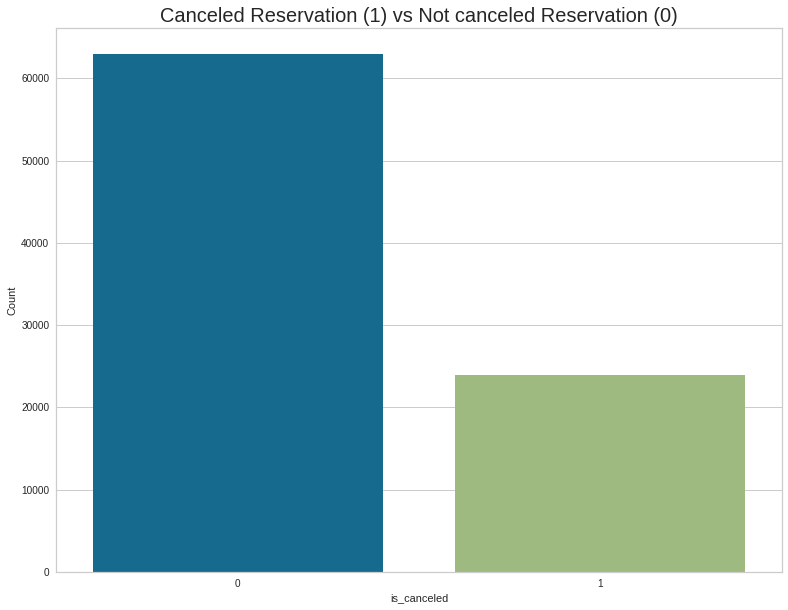

In [ ]:
is_cancel_count = pd.DataFrame(data.groupby(['is_canceled']).size())
is_cancel_count.columns = ['Count']
is_cancel_count = is_cancel_count.reset_index()
#is_cancel_count
plt.figure(figsize = (13,10))
plt.title("Canceled Reservation (1) vs Not canceled Reservation (0)", fontdict={'fontsize': 20})
ax = sns.barplot(x = "is_canceled", y = 'Count', data = is_cancel_count)

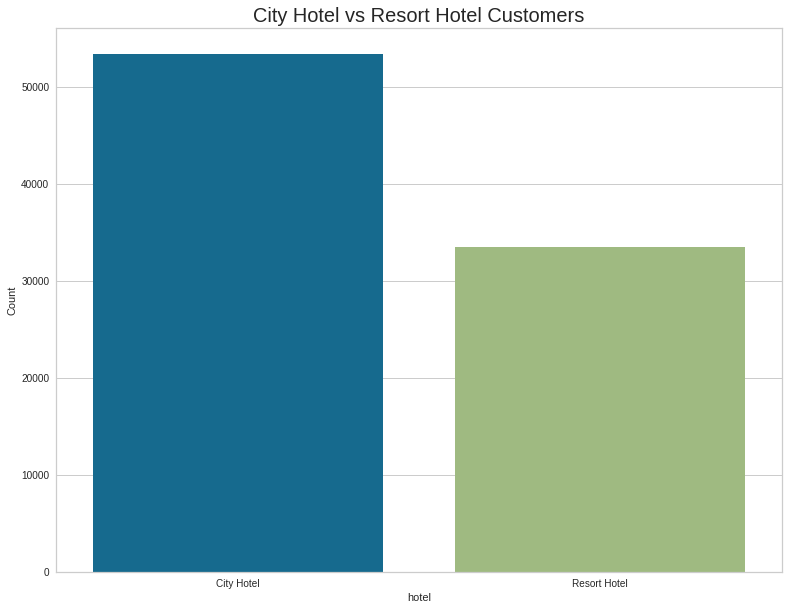

In [ ]:
# City Hotel vs Resort Hotel Reservation Status
hotel_type_count = pd.DataFrame(data.groupby(['hotel'])['reservation_status'].size())
hotel_type_count.columns = ['Count']
hotel_type_count = hotel_type_count.reset_index()

plt.figure(figsize = (13,10))
plt.title("City Hotel vs Resort Hotel Customers", fontdict={'fontsize': 20})
ax = sns.barplot(x = "hotel", y = 'Count', data = hotel_type_count)

In [ ]:
hotel_type_count

,hotel,Count
0,City Hotel,53418
1,Resort Hotel,33522


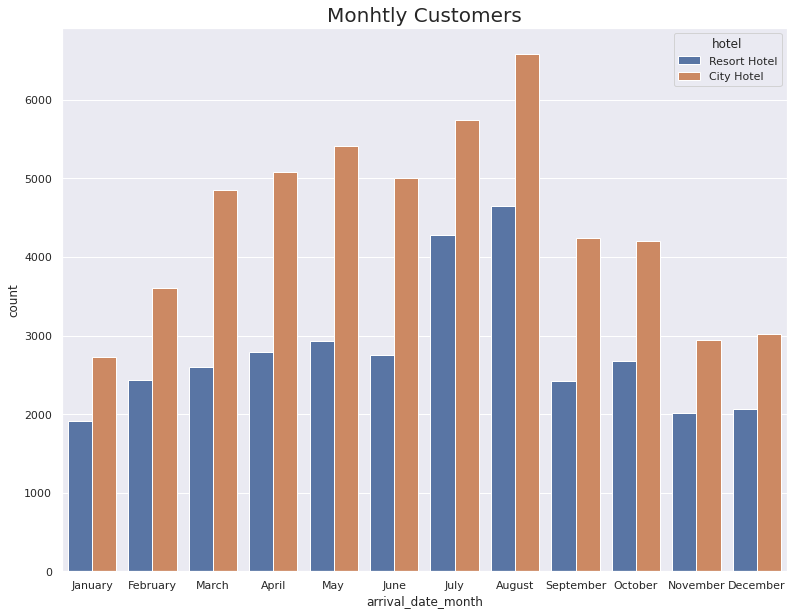

In [ ]:
plt.figure(figsize = (13,10))
plt.title("Monthly Customers", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = data)

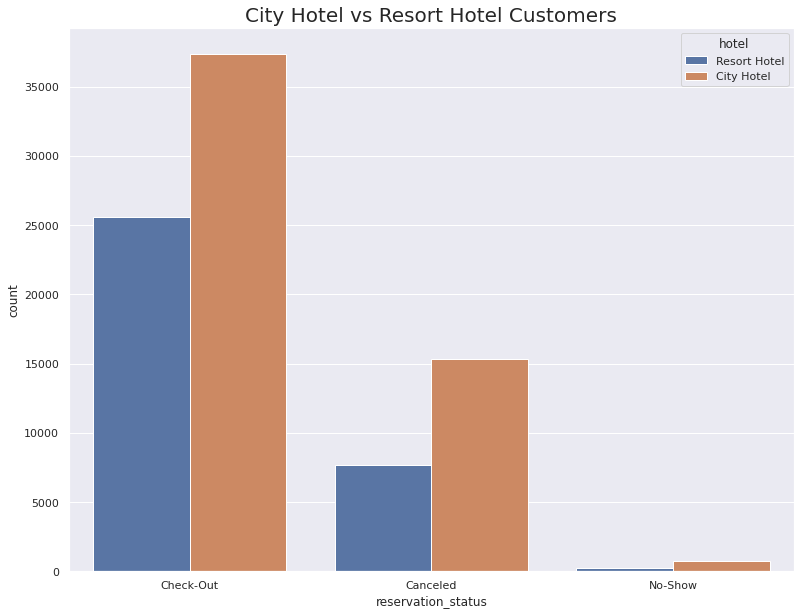

In [ ]:
# City Hotel vs Resort Hotel Reservation Status
plt.figure(figsize = (13,10))
plt.title("City Hotel vs Resort Hotel Customers", fontdict={'fontsize': 20})
ax = sns.countplot(x = "reservation_status", hue = 'hotel', data = data)

In [ ]:
# Pie plot
count_is_canceled = pd.DataFrame(data.groupby(['is_canceled']).size())
count_is_canceled.columns = ['Count']
count_is_canceled = count_is_canceled.reset_index()

fig = px.pie(count_is_canceled, values ="Count", names="is_canceled", title="Is canceled", template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [ ]:
# Pie plot
count_reservation_status = pd.DataFrame(data.groupby(['reservation_status']).size())
count_reservation_status.columns = ['Count']
count_reservation_status = count_reservation_status.reset_index()

fig = px.pie(count_reservation_status, values ="Count", names="reservation_status", title="Reservation Status", template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [ ]:
# Review paired relations using seaborn.
data_num = data.select_dtypes(include=['float64','int64'])
# sns.pairplot(data_num) 

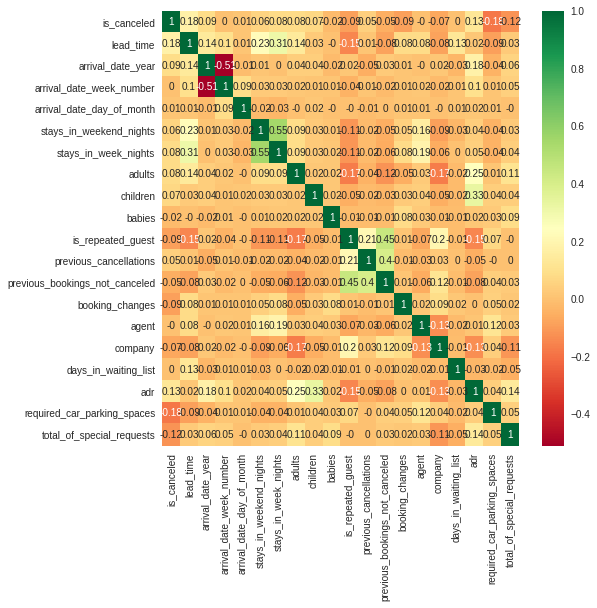

In [ ]:
#Pearson Correlation Heatmap
plt.figure(figsize=(8,8))
sns.heatmap(round(data_num.corr(),2),annot=True,cmap="RdYlGn")

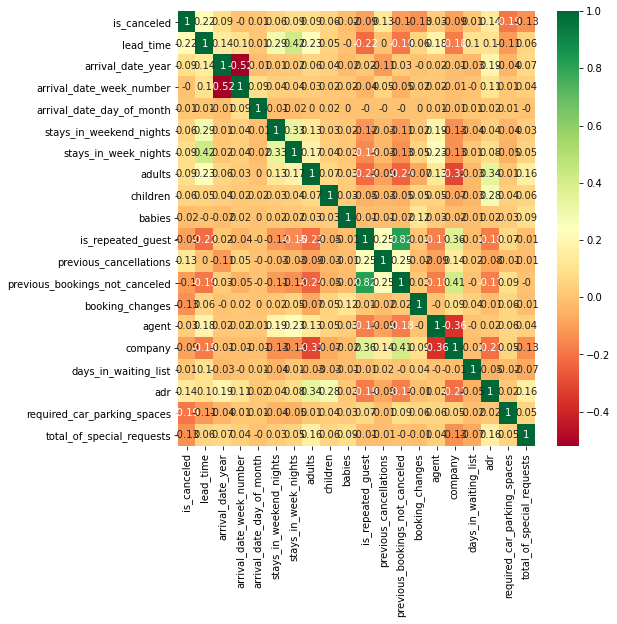

In [ ]:
#Spearman Correalation Heatmap
plt.figure(figsize=(8,8))
corr = data_num.corr(method = 'spearman')
sns.heatmap(round(corr,2), annot = True,cmap="RdYlGn")
plt.show()

In [ ]:
data.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.183730,0.087665,0.000864,0.005281,0.059599,0.082818,0.080295,0.067027,-0.020593,-0.090145,0.050965,-0.050553,-0.094050,-0.000841,-0.074127,0.004302,0.126675,-0.183704,-0.121794
lead_time,0.183730,1.000000,0.138786,0.100970,0.009865,0.233679,0.309916,0.137500,0.027704,-0.003954,-0.148009,0.005517,-0.076399,0.076764,0.079755,-0.075681,0.132163,0.019758,-0.085753,0.033038
arrival_date_year,0.087665,0.138786,1.000000,-0.514123,-0.010282,0.005000,0.003930,0.037455,0.040791,-0.023401,0.024048,-0.053973,0.028195,0.008786,-0.002741,0.023283,-0.028184,0.175988,-0.038615,0.064415
arrival_date_week_number,0.000864,0.100970,-0.514123,1.000000,0.093640,0.026096,0.027368,0.023778,0.013417,0.013848,-0.037271,0.006634,-0.020757,0.011464,0.019842,-0.022865,0.013883,0.097718,0.008637,0.046125
arrival_date_day_of_month,0.005281,0.009865,-0.010282,0.093640,1.000000,-0.017278,-0.027566,-0.001358,0.015846,-0.000752,-0.004401,-0.008687,0.000661,0.006498,0.006388,-0.000320,0.006585,0.022246,0.008679,-0.001587
stays_in_weekend_nights,0.059599,0.233679,0.005000,0.026096,-0.017278,1.000000,0.551159,0.086270,0.027842,0.013488,-0.107932,-0.020676,-0.054141,0.049066,0.159046,-0.087948,-0.032017,0.036015,-0.042651,0.030461
stays_in_week_nights,0.082818,0.309916,0.003930,0.027368,-0.027566,0.551159,1.000000,0.094405,0.030252,0.015891,-0.114665,-0.018904,-0.056928,0.084199,0.191660,-0.063167,0.001796,0.050935,-0.043987,0.035449
adults,0.080295,0.137500,0.037455,0.023778,-0.001358,0.086270,0.094405,1.000000,0.022419,0.016249,-0.173194,-0.042158,-0.117754,-0.049145,0.028301,-0.169591,-0.016125,0.245287,0.009261,0.110777
children,0.067027,0.027704,0.040791,0.013417,0.015846,0.027842,0.030252,0.022419,1.000000,0.017482,-0.045893,-0.019136,-0.028476,0.030910,0.041679,-0.050110,-0.020526,0.326293,0.037181,0.044391
babies,-0.020593,-0.003954,-0.023401,0.013848,-0.000752,0.013488,0.015891,0.016249,0.017482,1.000000,-0.013017,-0.005336,-0.008869,0.080791,0.029308,-0.011034,-0.006865,0.022694,0.030476,0.094475


# Classification (is_canceled)



In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
numerical_features = data.select_dtypes(include=['float64','int64']).columns.tolist()
numerical_features.remove('is_canceled')
categorical_features = data.select_dtypes(exclude=['float64','int64']).columns.tolist()
categorical_features.remove('reservation_status')
categorical_features.remove('reservation_status_date')

In [ ]:
numerical_features

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [ ]:
len(numerical_features)

19

In [ ]:
len(categorical_features)

10

In [7]:
# features = numerical_features + categorical_features
X = data.drop(columns = ["is_canceled"])[numerical_features + categorical_features]
y = data["is_canceled"]

In [ ]:
X.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
21965,2,2017,4,25,0,1,1,0.0,0,1,0,4,0,0.0,86.0,0,35.00,0,0,Resort Hotel,January,BB,PRT,Corporate,TA/TO,A,D,No Deposit,Transient
31678,0,2017,1,3,0,1,1,0.0,0,0,0,0,0,240.0,0.0,0,68.00,1,0,Resort Hotel,January,BB,PRT,Online TA,TA/TO,E,E,No Deposit,Transient
104097,306,2017,1,2,1,3,2,0.0,0,0,0,0,1,9.0,0.0,0,67.15,0,0,City Hotel,January,SC,ITA,Online TA,TA/TO,A,A,No Deposit,Transient-Party
104098,9,2017,1,2,1,3,2,1.0,0,0,0,0,0,9.0,0.0,0,116.15,0,0,City Hotel,January,BB,ITA,Online TA,TA/TO,A,A,No Deposit,Transient
31675,1,2017,1,3,0,1,2,0.0,0,0,0,0,0,240.0,0.0,0,48.00,0,1,Resort Hotel,January,BB,ESP,Online TA,TA/TO,A,D,No Deposit,Transient


In [10]:
# Create numerical_transformer and categorical_transformer
numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Use ColumnTransformer by selecting column by names
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_features),('cat', categorical_transformer, categorical_features)])

# train, test split
# 80% train
# 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

# Decision Tree


In [9]:
# %%time
clf = Pipeline(steps=[('preprocessor', preprocessor),('classifier', DecisionTreeClassifier())])

model_name = "Decision Tree"
check_params = {'classifier__criterion':['gini', 'entropy'], 
                'classifier__splitter': ['best', 'random'],
                'classifier__ccp_alpha': [0.0001, 0.001, 0.005, 0.010, 0.015, 0.020, 0.025],
               'classifier__max_depth': np.arange(3, 15)}
# clf.fit(X_train, y_train)
# print(model_name + " Train score: " + str(clf.score(X_train, y_train)))
# print(model_name + " Test score: " + str(clf.score(X_test, y_test)))
cv_best_score = 0
cv_best_params = None 
print(model_name + " GridSearch Starts")
for cv in tqdm(range(3, 10)):
    create_grid = GridSearchCV(clf, param_grid=check_params, cv=cv, n_jobs=1)
    create_grid.fit(X_train, y_train)
    cv_score = create_grid.score(X_test, y_test)
    cv_params = create_grid.best_params_
    print("Score for %d fold CV := %5.4f" %(cv, cv_score))
    print("!!!! Best fit parameters from GridSearchCV !!!!")
    print(cv_params)
    if(cv_score > cv_best_score):
        cv_best_score = cv_score
        cv_best_params = cv_params

In [ ]:
cv_best_params

{'classifier__ccp_alpha': 0.001,
 'classifier__criterion': 'gini',
 'classifier__max_depth': 12,
 'classifier__splitter': 'best'}

In [ ]:
cv_best_params['classifier__ccp_alpha']

0.001

In [10]:
%%time
Decision_tree_best_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 12, splitter = 'best', ccp_alpha = 0.001)

# Decision_tree_best_model = DecisionTreeClassifier(criterion = cv_best_params['classifier__criterion'], max_depth = cv_best_params['classifier__max_depth'], splitter = cv_best_params['classifier__splitter'], ccp_alpha = cv_best_params['classifier__ccp_alpha'])
clf_best_decision_tree = Pipeline(steps=[('preprocessor', preprocessor),('classifier', Decision_tree_best_model)])
clf_best_decision_tree.fit(X_train, y_train)
y_pred_train = clf_best_decision_tree.predict(X_train)
y_pred_test = clf_best_decision_tree.predict(X_test)
conf_matrix_test = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
conf_matrix_train = pd.DataFrame(confusion_matrix(y_train, y_pred_train))
print('Decision Tree training data confusion matrix')
print(conf_matrix_train)
print('Decision Tree testing data confusion matrix')
print(conf_matrix_test)

print('Decision Tree training accuracy rate: {}'.format(accuracy_score(y_train, y_pred_train)))
print('Decision Tree test accuracy rate: {}'.format(accuracy_score(y_test, y_pred_test)))

print('Decision Tree training error rate: {}'.format(1 - accuracy_score(y_train, y_pred_train)))
print('Decision Tree test error rate: {}'.format(1 - accuracy_score(y_test, y_pred_test)))

print('Decision Tree training matthews_corrcoef Score: {}'.format(matthews_corrcoef(y_train, y_pred_train)))
print('Decision Tree test matthews_corrcoef score: {}'.format(matthews_corrcoef(y_test, y_pred_test)))

target_names = ['0', '1']
print("Train Classification Report")
print(classification_report(y_train, y_pred_train, target_names=target_names))
print("Test Classification Report")
print(classification_report(y_test, y_pred_test, target_names=target_names))

Decision Tree training data confusion matrix
       0     1
0  46918  3373
1   9676  9585
Decision Tree testing data confusion matrix
       0     1
0  11824   838
1   2382  2344
Decision Tree training accuracy rate: 0.8123849781458478
Decision Tree test accuracy rate: 0.8148148148148148
Decision Tree training error rate: 0.18761502185415224
Decision Tree test error rate: 0.18518518518518523
Decision Tree training matthews_corrcoef Score: 0.49484840798385155
Decision Tree test matthews_corrcoef score: 0.4945108372377544
Train Classification Report
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     50291
           1       0.74      0.50      0.59     19261

    accuracy                           0.81     69552
   macro avg       0.78      0.72      0.74     69552
weighted avg       0.80      0.81      0.80     69552

Test Classification Report
              precision    recall  f1-score   support

           0       0.83      0.93    

In [8]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    print("run")
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt    

# Decision Tree Graph

In [11]:
fig, axes = plt.subplots(2,3, figsize=(15, 10))

title = "Learning Curves (Decision Tree Training Dataset 1 Hotel)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = Pipeline(steps=[('preprocessor', preprocessor),('classifier', Decision_tree_best_model)])
# clf_best_decision_tree.fit(X_train, y_train)

# estimator = DecisionTreeClassifier(criterion = 'gini', max_depth = 12, splitter = 'best', ccp_alpha = 0.001)

plot_learning_curve(estimator, title, X_train, y_train,cv=cv, n_jobs=-1, ylim=(.8, 1.0), axes=axes[0, :])
title = "Learning Curves (Decision Tree Test Dataset 1 Hotel)"

plot_learning_curve(estimator, title, X_test, y_test,cv=cv, n_jobs=-1, ylim=(.8, 1.0), axes=axes[1, :])

plt.savefig('Decision_Tree_Learning_Curve.png')
# plt.show()

# Neural Networks

In [9]:
%%time
# model = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(100,), random_state = 1)
# model = MLPClassifier(hidden_layer_sizes=(100, ), alpha=0.0001, batch_size='auto', learning_rate='constant')
model = MLPClassifier(hidden_layer_sizes=(100, ), alpha=0.0001, batch_size='auto', learning_rate='constant', power_t=0.5, shuffle=True, random_state=0, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
clf = Pipeline(steps=[('preprocessor', preprocessor),('ann', model)])

model_name = "Neural Network"
check_params = {'ann__activation':['logistic', 'tanh', 'relu'], 
                'ann__solver': ['adam', 'sgd'],
                'ann__learning_rate_init': [0.001, 0.005, 0.010, 0.05, 0.1],
                'ann__max_iter': [50, 100, 150, 200]}
# clf.fit(X_train, y_train)
# print(model_name + " Train score: " + str(clf.score(X_train, y_train)))
# print(model_name + " Test score: " + str(clf.score(X_test, y_test)))
cv_best_score = 0
cv_best_params = None 
print(model_name + " GridSearch Starts")
for cv in tqdm(range(3, 10)):
    create_grid = GridSearchCV(clf, param_grid=check_params, cv=cv, n_jobs=-1, return_train_score=False)
    create_grid.fit(X_train, y_train)
    cv_score = create_grid.score(X_test, y_test)
    cv_params = create_grid.best_params_
    print("Score for %d fold CV := %5.4f" %(cv, cv_score))
    print("!!!! Best fit parameters from GridSearchCV !!!!")
    print(cv_params)
    if(cv_score > cv_best_score):
        cv_best_score = cv_score
        cv_best_params = cv_params

In [10]:
%%time
neural_network_best_model = MLPClassifier(activation='logistic', learning_rate_init=0.005, solver='adam', max_iter=50)

# neural_network_best_model = MLPClassifier((activation=cv_best_params['ann__activation'], learning_rate_init=cv_best_params['ann__learning_rate_init'], solver=cv_best_params['ann__solver'], max_iter=cv_best_params['ann__max_iter'])
clf_best_neural_network = Pipeline(steps=[('preprocessor', preprocessor),('classifier', neural_network_best_model)])
clf_best_neural_network.fit(X_train, y_train)
y_pred_train = clf_best_neural_network.predict(X_train)
y_pred_test = clf_best_neural_network.predict(X_test)
conf_matrix_test = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
conf_matrix_train = pd.DataFrame(confusion_matrix(y_train, y_pred_train))
print('Neural Networks training data confusion matrix')
print(conf_matrix_train)
print('Neural Networks testing data confusion matrix')
print(conf_matrix_test)

print('Neural Networks training accuracy rate: {}'.format(accuracy_score(y_train, y_pred_train)))
print('Neural Networks test accuracy rate: {}'.format(accuracy_score(y_test, y_pred_test)))

print('Neural Networks training error rate: {}'.format(1 - accuracy_score(y_train, y_pred_train)))
print('Neural Networks test error rate: {}'.format(1 - accuracy_score(y_test, y_pred_test)))

print('Neural Networks training matthews_corrcoef Score: {}'.format(matthews_corrcoef(y_train, y_pred_train)))
print('Neural Networks test matthews_corrcoef score: {}'.format(matthews_corrcoef(y_test, y_pred_test)))

target_names = ['0', '1']
print("Train Classification Report")
print(classification_report(y_train, y_pred_train, target_names=target_names))
print("Test Classification Report")
print(classification_report(y_test, y_pred_test, target_names=target_names))

/Users/lzhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Networks training data confusion matrix
       0      1
0  47480   2811
1   4981  14280
Neural Networks testing data confusion matrix
       0     1
0  11479  1183
1   1686  3040
Neural Networks training accuracy rate: 0.8879687140556706
Neural Networks test accuracy rate: 0.8350011502185415
Neural Networks training error rate: 0.11203128594432943
Neural Networks test error rate: 0.1649988497814585
Neural Networks training matthews_corrcoef Score: 0.712508232009473
Neural Networks test matthews_corrcoef score: 0.5704247002560409
Train Classification Report
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     50291
           1       0.84      0.74      0.79     19261

    accuracy                           0.89     69552
   macro avg       0.87      0.84      0.85     69552
weighted avg       0.89      0.89      0.89     69552

Test Classification Report
              precision    recall  f1-score   support

           0       0.

# Neural Network Graph

In [13]:
fig, axes = plt.subplots(2,3, figsize=(15, 10))

title = "Learning Curves (Neural Network Training Dataset 1 Hotel)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = Pipeline(steps=[('preprocessor', preprocessor),('classifier', neural_network_best_model)])
# estimator = MLPClassifier(activation='logistic', learning_rate_init=0.005, solver='adam', max_iter=50)

plot_learning_curve(estimator, title, X_train, y_train,cv=cv, n_jobs=-1, axes=axes[0, :])
title = "Learning Curves (Neural Network Test Dataset 1 Hotel)"

plot_learning_curve(estimator, title, X_test, y_test,cv=cv, n_jobs=-1, axes=axes[1, :])

plt.savefig('Neural_Network_Learning_Curve.png')
# plt.show()

# Boosting

In [ ]:
%%time
model = AdaBoostClassifier(random_state=0)
clf = Pipeline(steps=[('preprocessor', preprocessor),('boost', model)])

model_name = "Boosting"

check_params = {'boost__base_estimator':[DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=3)], 
                'boost__n_estimators': [10, 20, 30, 40, 50, 60],
                'boost__learning_rate': [0.1, 0.5, 1.0],
                'boost__algorithm': ['SAMME', 'SAMME.R']}

# clf.fit(X_train, y_train)
# print(model_name + " Train score: " + str(clf.score(X_train, y_train)))
# print(model_name + " Test score: " + str(clf.score(X_test, y_test)))
cv_best_score = 0
cv_best_params = None 
print(model_name + " GridSearch Starts")
for cv in tqdm(range(3, 10)):
    create_grid = GridSearchCV(clf, param_grid=check_params, cv=cv, n_jobs=1, return_train_score=False)
    create_grid.fit(X_train, y_train)
    cv_score = create_grid.score(X_test, y_test)
    cv_params = create_grid.best_params_
    print("Score for %d fold CV := %5.4f" %(cv, cv_score))
    print("!!!! Best fit parameters from GridSearchCV !!!!")
    print(cv_params)
    if(cv_score > cv_best_score):
        cv_best_score = cv_score
        cv_best_params = cv_params

In [14]:
%%time
boosting_best_model = AdaBoostClassifier(random_state=0, algorithm='SAMME.R', base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.5, n_estimators=50)
# boosting_best_model = AdaBoostClassifier((activation=cv_best_params['ann__activation'], learning_rate_init=cv_best_params['ann__learning_rate_init'], solver=cv_best_params['ann__solver'], max_iter=cv_best_params['ann__max_iter'])
clf_best_boosting = Pipeline(steps=[('preprocessor', preprocessor),('classifier', boosting_best_model)])
clf_best_boosting.fit(X_train, y_train)
y_pred_train = clf_best_boosting.predict(X_train)
y_pred_test = clf_best_boosting.predict(X_test)
conf_matrix_test = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
conf_matrix_train = pd.DataFrame(confusion_matrix(y_train, y_pred_train))
print('Boosting training data confusion matrix')
print(conf_matrix_train)
print('Boosting testing data confusion matrix')
print(conf_matrix_test)

print('Boosting training accuracy rate: {}'.format(accuracy_score(y_train, y_pred_train)))
print('Boosting test accuracy rate: {}'.format(accuracy_score(y_test, y_pred_test)))

print('Boosting training error rate: {}'.format(1 - accuracy_score(y_train, y_pred_train)))
print('Boosting test error rate: {}'.format(1 - accuracy_score(y_test, y_pred_test)))

print('Boosting training matthews_corrcoef Score: {}'.format(matthews_corrcoef(y_train, y_pred_train)))
print('Boosting test matthews_corrcoef score: {}'.format(matthews_corrcoef(y_test, y_pred_test)))

target_names = ['0', '1']
print("Train Classification Report")
print(classification_report(y_train, y_pred_train, target_names=target_names))
print("Test Classification Report")
print(classification_report(y_test, y_pred_test, target_names=target_names))

Boosting training data confusion matrix
       0      1
0  46213   4078
1   7678  11583
Boosting testing data confusion matrix
       0     1
0  11676   986
1   1868  2858
Boosting training accuracy rate: 0.8309753853232114
Boosting test accuracy rate: 0.8358638141246837
Boosting training error rate: 0.16902461467678864
Boosting test error rate: 0.1641361858753163
Boosting training matthews_corrcoef Score: 0.5573858876770261
Boosting test matthews_corrcoef score: 0.5648530141212741
Train Classification Report
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     50291
           1       0.74      0.60      0.66     19261

    accuracy                           0.83     69552
   macro avg       0.80      0.76      0.78     69552
weighted avg       0.82      0.83      0.83     69552

Test Classification Report
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     12662
           1       0.7

# Boosting Graph

In [15]:
fig, axes = plt.subplots(2,3, figsize=(15, 10))

title = "Learning Curves (Boosting Training Dataset 1 Hotel)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = Pipeline(steps=[('preprocessor', preprocessor),('classifier', boosting_best_model)])
# estimator = MLPClassifier(activation='logistic', learning_rate_init=0.005, solver='adam', max_iter=50)

plot_learning_curve(estimator, title, X_train, y_train,cv=cv, n_jobs=-1, axes=axes[0, :])
title = "Learning Curves (Boosting Test Dataset 1 Hotel)"

plot_learning_curve(estimator, title, X_test, y_test,cv=cv, n_jobs=-1, axes=axes[1, :])

plt.savefig('Boosting_Learning_Curve.png')
# plt.show()

# Support Vector Machine

In [ ]:
%%time

model = SVC(C=1.0, degree=3, coef0=0.0, shrinking=True, probability=False, cache_size=200, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=0)
clf = Pipeline(steps=[('preprocessor', preprocessor),('svm', model)])

model_name = "Support Vector Machine"

check_params = {'svm__kernel':['poly', 'rbf', 'sigmoid'], 
                'svm__gamma': ['scale', 'auto'],
                'svm__tol': [0.001, 0.01, 0.1],
                'svm__class_weight': [None, 'balanced']}

# clf.fit(X_train, y_train)
# print(model_name + " Train score: " + str(clf.score(X_train, y_train)))
# print(model_name + " Test score: " + str(clf.score(X_test, y_test)))
cv_best_score = 0
cv_best_params = None 
print(model_name + " GridSearch Starts")
for cv in tqdm(range(3, 10)):
    create_grid = GridSearchCV(clf, param_grid=check_params, cv=cv, n_jobs=1, return_train_score=False)
    create_grid.fit(X_train, y_train)
    cv_score = create_grid.score(X_test, y_test)
    cv_params = create_grid.best_params_
    print("Score for %d fold CV := %5.4f" %(cv, cv_score))
    print("!!!! Best fit parameters from GridSearchCV !!!!")
    print(cv_params)
    if(cv_score > cv_best_score):
        cv_best_score = cv_score
        cv_best_params = cv_params

In [ ]:
%%time
svm_best_model = SVC(kernel='rbf', gamma='auto')
# svm_best_model = SVC(random_state=0, kernel='rbf', tol=0.1, gamma='scale', class_weight=None)
# svm_best_model = SVC(random_state=0, kernel='rbf', tol=0.1, gamma='scale', class_weight=None)
clf_best_svm = Pipeline(steps=[('preprocessor', preprocessor),('svm', svm_best_model)])

clf_best_svm.fit(X_train, y_train)
y_pred_train = clf_best_svm.predict(X_train)
y_pred_test = clf_best_svm.predict(X_test)
conf_matrix_test = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
conf_matrix_train = pd.DataFrame(confusion_matrix(y_train, y_pred_train))
print('svm training data confusion matrix')
print(conf_matrix_train)
print('svm testing data confusion matrix')
print(conf_matrix_test)

print('svm training accuracy rate: {}'.format(accuracy_score(y_train, y_pred_train)))
print('svm test accuracy rate: {}'.format(accuracy_score(y_test, y_pred_test)))

print('svm training error rate: {}'.format(1 - accuracy_score(y_train, y_pred_train)))
print('svm test error rate: {}'.format(1 - accuracy_score(y_test, y_pred_test)))

print('svm training matthews_corrcoef Score: {}'.format(matthews_corrcoef(y_train, y_pred_train)))
print('svm test matthews_corrcoef score: {}'.format(matthews_corrcoef(y_test, y_pred_test)))

target_names = ['0', '1']
print("Train Classification Report")
print(classification_report(y_train, y_pred_train, target_names=target_names))
print("Test Classification Report")
print(classification_report(y_test, y_pred_test, target_names=target_names))

# SVM Graph

In [14]:
svm_best_model = SVC(kernel='rbf', gamma='auto')

fig, axes = plt.subplots(2,3, figsize=(15, 10))

title = "Learning Curves (SVM Training Dataset 1 Hotel)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = Pipeline(steps=[('preprocessor', preprocessor),('svm', svm_best_model)])
# estimator = MLPClassifier(activation='logistic', learning_rate_init=0.005, solver='adam', max_iter=50)

plot_learning_curve(estimator, title, X_train, y_train,cv=cv, n_jobs=-1, axes=axes[0, :])
title = "Learning Curves (SVM Test Dataset 1 Hotel)"

plot_learning_curve(estimator, title, X_test, y_test,cv=cv, n_jobs=-1, axes=axes[1, :])

plt.savefig('SVM_Learning_Curve.png')
# plt.show()

run
run


# KNN

In [ ]:
%%time

model = KNeighborsClassifier(algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None)
clf = Pipeline(steps=[('preprocessor', preprocessor),('knn', model)])

model_name = "K Nearest Neighbor"

check_params = {'knn__n_neighbors':np.arange(5,10,2), 
                'knn__weights': ['uniform', 'distance']}

# clf.fit(X_train, y_train)
# print(model_name + " Train score: " + str(clf.score(X_train, y_train)))
# print(model_name + " Test score: " + str(clf.score(X_test, y_test)))
cv_best_score = 0
cv_best_params = None 
print(model_name + " GridSearch Starts")
for cv in tqdm(range(3, 10)):
    create_grid = GridSearchCV(clf, param_grid=check_params, cv=cv, n_jobs=1, return_train_score=False)
    create_grid.fit(X_train, y_train)
    cv_score = create_grid.score(X_test, y_test)
    cv_params = create_grid.best_params_
    print("Score for %d fold CV := %5.4f" %(cv, cv_score))
    print("!!!! Best fit parameters from GridSearchCV !!!!")
    print(cv_params)
    if(cv_score > cv_best_score):
        cv_best_score = cv_score
        cv_best_params = cv_params

In [11]:
%%time
knn_best_model = KNeighborsClassifier(n_neighbors=3, weights='distance')
# knn_best_model = SVC(random_state=0, kernel='rbf', tol=0.1, gamma='scale', class_weight=None)
# knn_best_model = SVC(random_state=0, kernel='rbf', tol=0.1, gamma='scale', class_weight=None)
clf_best_knn = Pipeline(steps=[('preprocessor', preprocessor),('classifier', knn_best_model)])

clf_best_knn.fit(X_train, y_train)
y_pred_train = clf_best_knn.predict(X_train)
y_pred_test = clf_best_knn.predict(X_test)
conf_matrix_test = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
conf_matrix_train = pd.DataFrame(confusion_matrix(y_train, y_pred_train))
print('knn training data confusion matrix')
print(conf_matrix_train)
print('knn testing data confusion matrix')
print(conf_matrix_test)

print('knn training accuracy rate: {}'.format(accuracy_score(y_train, y_pred_train)))
print('knn test accuracy rate: {}'.format(accuracy_score(y_test, y_pred_test)))

print('knn training error rate: {}'.format(1 - accuracy_score(y_train, y_pred_train)))
print('knn test error rate: {}'.format(1 - accuracy_score(y_test, y_pred_test)))

print('knn training matthews_corrcoef Score: {}'.format(matthews_corrcoef(y_train, y_pred_train)))
print('knn test matthews_corrcoef score: {}'.format(matthews_corrcoef(y_test, y_pred_test)))

target_names = ['0', '1']
print("Train Classification Report")
print(classification_report(y_train, y_pred_train, target_names=target_names))
print("Test Classification Report")
print(classification_report(y_test, y_pred_test, target_names=target_names))

knn training data confusion matrix
       0      1
0  50276     15
1    150  19111
knn testing data confusion matrix
       0     1
0  10818  1844
1   1853  2873
knn training accuracy rate: 0.997627674258109
knn test accuracy rate: 0.7873821025994939
knn training error rate: 0.002372325741890946
knn test error rate: 0.21261789740050607
knn training matthews_corrcoef Score: 0.9940751703878702
knn test matthews_corrcoef score: 0.4625575107863101
Train Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50291
           1       1.00      0.99      1.00     19261

    accuracy                           1.00     69552
   macro avg       1.00      1.00      1.00     69552
weighted avg       1.00      1.00      1.00     69552

Test Classification Report
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     12662
           1       0.61      0.61      0.61      4726

    ac

# KNN Graph

In [11]:
fig, axes = plt.subplots(2,3, figsize=(15, 10))

knn_best_model = KNeighborsClassifier(n_neighbors=3, weights='distance')
title = "Learning Curves (KNN Training Dataset 1 Hotel)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = Pipeline(steps=[('preprocessor', preprocessor),('classifier', knn_best_model)])
# estimator = MLPClassifier(activation='logistic', learning_rate_init=0.005, solver='adam', max_iter=50)

plot_learning_curve(estimator, title, X_train, y_train,cv=cv, n_jobs=6, axes=axes[0, :])
title = "Learning Curves (KNN Test Dataset 1 Hotel)"

plot_learning_curve(estimator, title, X_test, y_test,cv=cv, n_jobs=6, axes=axes[1, :])

plt.savefig('KNN_Learning_Curve.png')
# plt.show()

run
run


DecisionTreeClassifier Train score: 0.9216126063952151
DecisionTreeClassifier Train Classification Report
precision {1: 0.943558257985549, 0: 0.8627897131971637}
recall {1: 0.948539334762245, 0: 0.8508140262993112}
f1 {1: 0.946042239860652, 0: 0.8567600231201724}


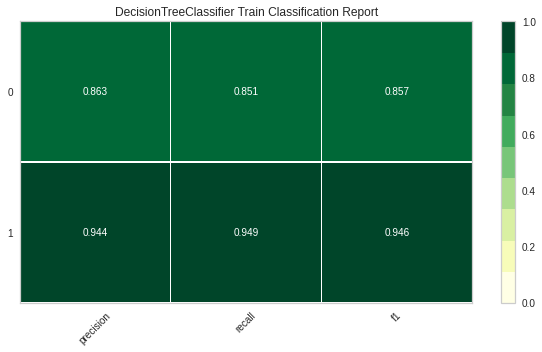

DecisionTreeClassifier Test score: 0.8231538992408558
DecisionTreeClassifier Test Classification Report
precision {1: 0.874211356466877, 0: 0.6856414613423959}
recall {1: 0.8822124950258655, 0: 0.6692929711797636}
f1 {1: 0.8781937017231136, 0: 0.6773685867170286}


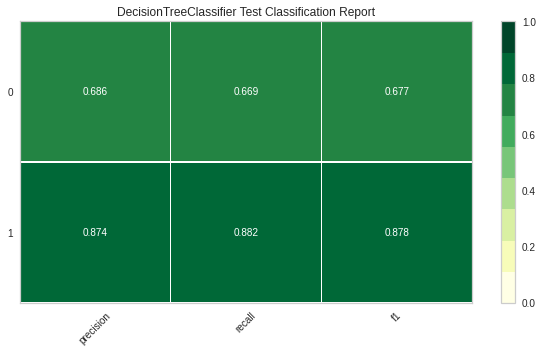

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



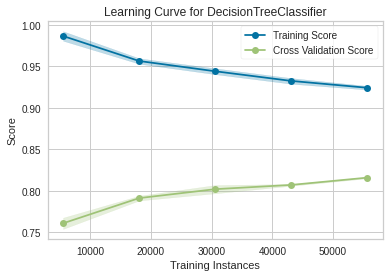

In [ ]:
# Create numerical_transformer and categorical_transformer
numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Use ColumnTransformer by selecting column by names
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_features),('cat', categorical_transformer, categorical_features)])

# train, test split
# 80% train
# 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
model = [SVC(gamma='auto')]
# models = [DecisionTreeClassifier(),
#           DecisionTreeClassifier(max_depth = 10)
#           MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state = 1),
#           AdaBoostClassifier(),
#           SVC(kernel='rbf'),
#           SVC(kernel='linear'),
#           KNeighborsClassifier(n_neighbors = 3),
#           KNeighborsClassifier(n_neighbors = 4)]

# models = [SVC(gamma='auto'),
#           DecisionTreeClassifier(random_state=42)]

# models = [  SVC(gamma='auto'), 
#             NuSVC(gamma='auto'), 
#             LinearSVC(),
#             SGDClassifier(max_iter=100, tol=1e-3), 
#             KNeighborsClassifier(),
#             LogisticRegression(solver='lbfgs'), 
#             LogisticRegressionCV(cv=3),
#             BaggingClassifier(), 
#             ExtraTreesClassifier(n_estimators=300),
#             RandomForestClassifier(n_estimators=300)]


def score_model(X_train, y_train, X_test, y_test, model):
    clf = Pipeline(steps=[('preprocessor', preprocessor),('classifier', model)])
    model_name = type(model).__name__

    train_graph_title = model_name + " Train Classification Report"
    visualizer = ClassificationReport(clf, classes=[1, 0], cmap="YlGn", size=(600, 360), title = train_graph_title)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_train, y_train)
    train_score = visualizer.score_
    print(model_name + " Train score: " + str(train_score))
    print(model_name + " Train Classification Report")
    classification_train_scores = visualizer.scores_
    for score_type in classification_train_scores:
        print(score_type, end = ' ')
        print(classification_train_scores[score_type])
    # a = visualizer.poof()

    test_graph_title = model_name + " Test Classification Report"
    visualizer = ClassificationReport(clf, classes=[1, 0], cmap="YlGn", size=(600, 360), title = test_graph_title)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    test_score = visualizer.score_
    print(model_name + " Test score: " + str(test_score))
    print(model_name + " Test Classification Report")
    classification_test_scores = visualizer.scores_
    for score_type in classification_test_scores:
        print(score_type, end = ' ')
        print(classification_test_scores[score_type])
    # g = visualizer.poof()

    learning_curve_title = model_name + " Learning Curve"
    visualizer = LearningCurve(clf, scoring = 'f1_weighted', n_jobs = 4)
    visualizer.fit(X_train, y_train)
    g = visualizer.poof()

for model in models:
    score_model(X_train, y_train, X_test, y_test, model)